this file is meant to test whether we can detect specific faces using pca

In [2]:
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def extract_features(image):
    ##method assumes that the image is a grayscale image

    # Apply LBP
    radius = 1
    num_points = 8 * radius
    lbp = local_binary_pattern(image, num_points, radius, method='uniform')
    
    # Flatten the LBP image into a feature vector
    feature_vector = lbp.flatten()
    
    return feature_vector

13233
(13000, 64, 64)
['Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abbas_Kiarostami', 'Abba_Eban', 'Abdel_Aziz', 'Abdel_Madi', 'Abdel_Nasser', 'Abdel_Nasser', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdulaziz_Kamilov', 'Abdullah_0001.pgm', 'Abdullah_0002.pgm', 'Abdullah_0003.pgm', 'Abdullah_0004.pgm', 'Abdullah_Ahmad', 'Abdullah_al-Attiyah', 'Abdullah_al-Attiyah', 'Abdullah_al-Attiyah', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullatif_Sener', 'Abdullatif_Sener', 'Abdul_Majeed', 'Abdul_Rahman', 'Abel_Aguilar', 'Abel_Pacheco', 'Abel_Pacheco', 'Abel_Pachec

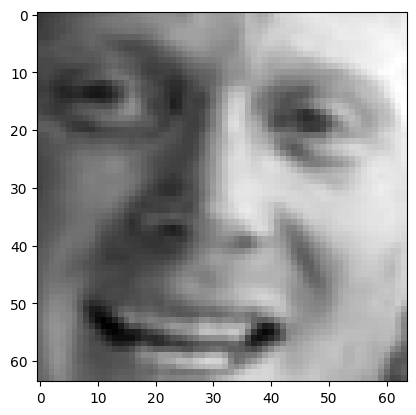

In [5]:
##load in images


dir="faces"
n=1300
samples=n*10+1
print(len(os.listdir(dir)))
Labels=os.listdir(dir)[1:samples]

temp2=[dir+"/"+i for i in Labels]
images=np.array([plt.imread(image) for image in temp2])
print(images.shape)
##display the first image
plt.imshow(images[0],cmap="gray")

##the labels are the first two components of the file name if you split on "_"
for i in range(len(Labels)):
    Labels[i]=Labels[i].split("_")[0]+"_"+Labels[i].split("_")[1]
print(Labels)
reshaped_images = images.reshape(images.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(reshaped_images, Labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

In [6]:

Vectors=[extract_features(image) for image in images]
##normalize the vectors
normalized=(Vectors-np.mean(Vectors))/np.std(Vectors, axis=0)

pca=PCA(n_components=100)
reduced=pca.fit_transform(normalized)
print(reduced.shape)
print(len(Labels))


(13000, 100)
13000


In [9]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

from joblib import dump, load

# Save the model to a file
dump(classifier, 'model.joblib')

# Load the model from a file
classifier = load('model.joblib')


In [20]:
def processImage(image):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image, 1.3, 5)
    ##coordinates of the faces
    cropped=[]
    for (x,y,w,h) in faces:
        cropped.append(image[y:y+h,x:x+w])
    ##resize the image to 64x64
    resized=[]
    for i in cropped:
        resized.append(cv2.resize(i,(64,64)))
    ##convert to grayscale
    gray=[]
    for i in resized:
        gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
    
    
    return gray

temp="faces2\\face@.jpeg" 
images=[]
for i in range(1,10):
    string=temp.replace("@",str(i))
    images.append(plt.imread(string))
images=np.array(images)

processedimages=[]
for i in images:
    faces=processImage(i)
    for j in faces:
        processedimages.append(j)
processedimages=np.array(processedimages)

##retrain the model with the new images of which the labels are "sam"
##add all but the second image to the training set
for i in range(1,len(processedimages)):
    X_train=np.vstack([X_train,processedimages[i].reshape(1,-1)])
    y_train.append("sam")

##retrain the model
classifier.fit(X_train,y_train)

##test the model
print(classifier.predict(processedimages[0].reshape(1,-1)))




    

['sam']
